In [1]:
# Kaggle IBM HR Analytics Employee Attrition & Performance
# https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
# https://medium.com/mlearning-ai/basic-exploratory-data-analysis-template-for-regression-problems-20ca00c58f7d
# https://levelup.gitconnected.com/exploratory-data-analysis-the-ultimate-workflow-a82b1d21f747
# 

In [2]:
# [] how many rows and columns
# [] find any missing values
# [] categorize your values to help determine what statistical and visualization methods can 
#    work with your dataset. You can place your values into these categories:
#    1. Categorical: Categorical variables can have a set number of values.
#    2. Continuous: Continuous variables can have an infinite number of values.
#    3. Discrete: Discrete variables can have a set number of values that must be numeric.
# [] find the shape of dataset (skewness, gaps, trends)
# [] identify relationships in dataset (correlations among variables) --> bivariate & 
#    multivariate analysis
# [] detect outliers or anomalous events

In [3]:
# statistical techniques
# [] univariate analysis & visualization of each field in the raw dataset, with summary statistics.
# [] bivariate analysis & visualizations and summary statistics that allow you to assess the 
#    relationship between each variable in the dataset and the target variable you’re looking at.
# [] multivariate analysis & visualizations, for mapping and understanding interactions between 
#    different fields in the data.
# [] Predictive models (insights), such as linear regression, use statistics and data to predict 
#    outcomes.
# [] clustering and dimension reduction techniques, which help create graphical displays of 
#    high-dimensional data containing many variables.
# [] K-means clustering is a clustering method in unsupervised learning where data points are 
#    assigned into K groups

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from mlxtend.plotting import plot_confusion_matrix
from scipy.stats import normaltest

#### load data set

In [5]:
train = pd.read_csv('data/hr-employee-attrition.csv')

In [6]:
# show first 5 rows
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# data set shape
train.shape

(1470, 35)

In [19]:
# list feature names
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# how many null values for each variable
train.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

In [10]:
# how many null values for individual variable
train["Age"].isnull().sum()

0

In [16]:
# calculate null percent
train.isnull().sum() / len(train) * 100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [11]:
# descriptive statistics (central tendency, dispersion and shape of a dataset’s distribution) 
# excluding NaN values.
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [18]:
# descriptive statistics only for non-numeric columns
train.describe(exclude=np.number).T

# or
# train.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [12]:
# show the dtype and columns, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# show the dtype only
train.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
# duplicated rows
train.duplicated().sum()

0

In [15]:
# duplicated for individual row
train.duplicated(subset=['Age']).sum()

1427

In [22]:
# count number of distinct elements
train.nunique().sort_values(ascending=False)

EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
PerformanceRating              2
OverTime                       2
Attrition 

In [24]:
# extract numerical features
numerical_features = [col_name for col_name in train.columns if 
                train[col_name].dtype in ['int64', 'float64']]

# or
numerical_features_2 = train.select_dtypes(include=np.number).columns

print("numerical features 1", numerical_features)
print("\n")

print("numerical features 2", numerical_features_2)
print("\n")

print("the 2 length are equal", len(numerical_features) == len(numerical_features_2))

numerical feature 1 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


numerical feature 2 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtC

In [25]:
# Extract text features
categorical_features = train.select_dtypes(exclude=np.number).columns
print(categorical_features)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [27]:
print("# data frame features", len(train.columns))
print("# numerical + categorical features", len(numerical_features)+len(categorical_features))

# data frame features 35
# numerical + categorical features 35


In [33]:
# categorical features relative frequencies
for feature in categorical_features:
    print(feature, '\n')
    print(f'{np.round((train[feature].value_counts() / train[feature].value_counts().sum()) * 100,2)}')
    print('\n')

Attrition 

No     83.88
Yes    16.12
Name: Attrition, dtype: float64


BusinessTravel 

Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: BusinessTravel, dtype: float64


Department 

Research & Development    65.37
Sales                     30.34
Human Resources            4.29
Name: Department, dtype: float64


EducationField 

Life Sciences       41.22
Medical             31.56
Marketing           10.82
Technical Degree     8.98
Other                5.58
Human Resources      1.84
Name: EducationField, dtype: float64


Gender 

Male      60.0
Female    40.0
Name: Gender, dtype: float64


JobRole 

Sales Executive              22.18
Research Scientist           19.86
Laboratory Technician        17.62
Manufacturing Director        9.86
Healthcare Representative     8.91
Manager                       6.94
Sales Representative          5.65
Research Director             5.44
Human Resources               3.54
Name: JobRole, dtype: float64


MaritalS

In [51]:
# # plot histograms for numerical features
# # TODO
# fig,ax = plt.subplots(3,3,figsize=(10,10))
# row = 0
# col = 0
# for count, feature in enumerate(numerical_features):
#     if (count%3 == 0) & (count > 0):
#         row += 1
#         col = 0
#     train[feature].plot(kind="kde",ax=ax[row,col])
#     ax[row,col].set_title(feature)
#     col += 1
# fig.show()
    

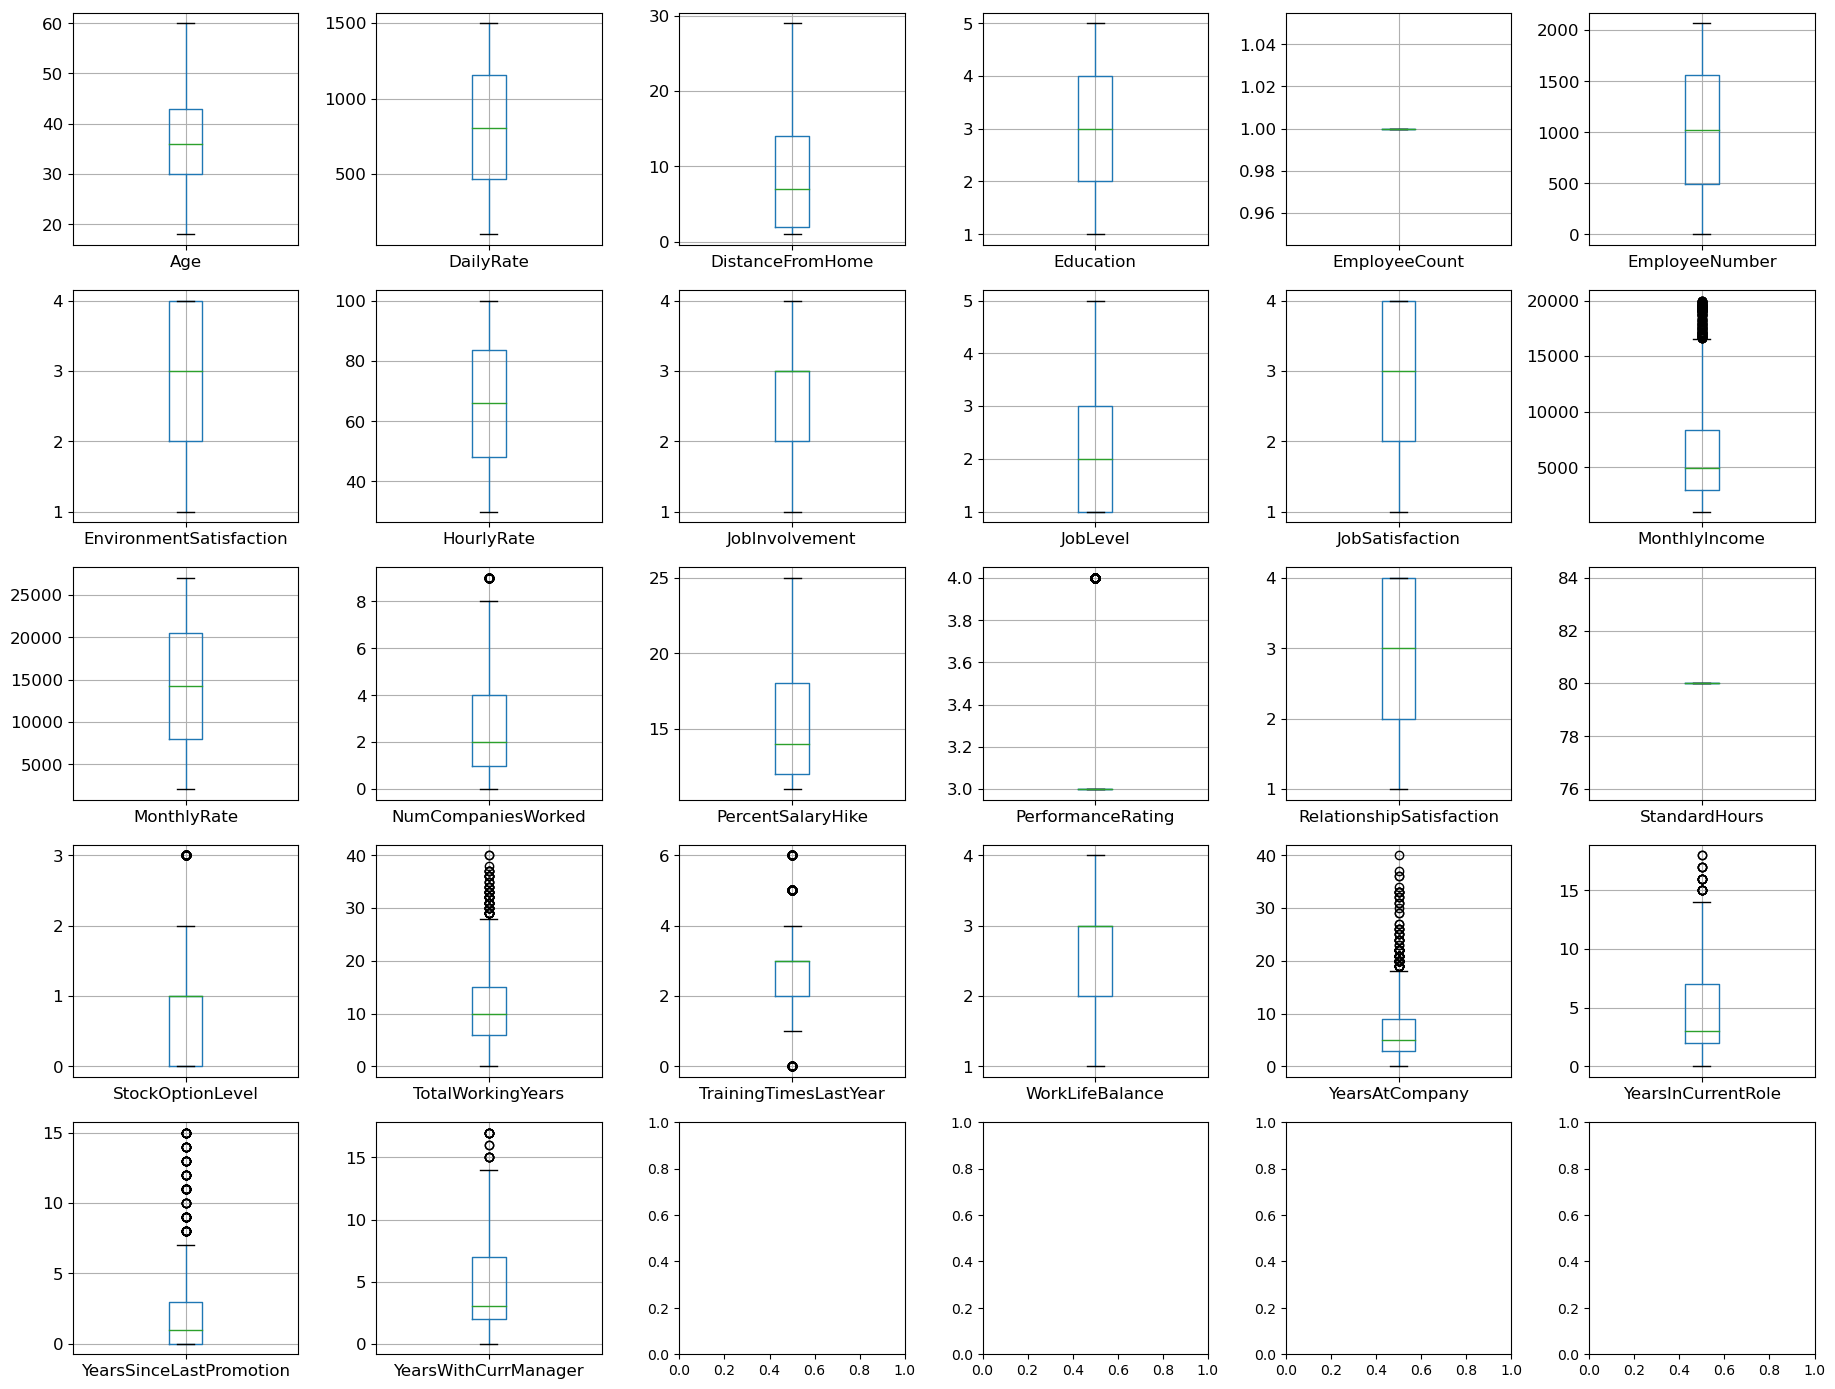

In [78]:
# plot each numerical feature individually using boxplots
fig, axes = plt.subplots(5,6) # create figure and axes

for count, feature in enumerate(list(train[numerical_features].columns.values)):
  a = train.boxplot(feature, ax=axes.flatten()[count], fontsize='large')

fig.set_size_inches(18.5, 14)
plt.tight_layout() 

plt.show()


In [43]:
len(numerical_features)

26

In [52]:
# # TODO
# num_cols = 4
# row = len(numerical_features)
# # set a number of rows
# if row%num_cols == 0:
#     num_rows = row//num_cols
# else:
#     num_rows = row//num_cols + 1
    
# # define the figure and axes
# fig, ax = plt.subplots(figsize=(17,12), 
#                        nrows=num_rows, 
#                        ncols=num_cols)

# # add a figure title
# fig.suptitle('Features of King County Homes Sold in 2014 and 2015', fontsize=21)

# #use a for loop to create each subplot:
# for feat in numerical_features:
#     row = numerical_features.index(feat)//num_cols
#     col = numerical_features.index(feat)%num_cols
    
#     ax[row, col].hist(train[feat], bins=20)
    
#     ax[row, col].set_title(feat.title()+' Distribution', 
#                            fontsize=18)
    
#     ax[row, col].set_xlabel(feat.title(),
#                             fontsize=15)
    
#     ax[row, col].set_ylabel('Number of Homes',
#                             fontsize=15)
    
# plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3)

In [53]:
# # distribution of target variable
# f, ax = plt.subplots(1,1, figsize=(15,5))
# graph = sns.countplot(y_train[‘surface’])
# graph.set_title(“Number of labels for each class”)
# plt.show()

In [57]:
# # distribution of all features
# plt.figure(figsize=(26, 16))
# for i, col in enumerate(train.columns[3:]):
#     plt.subplot(3, 4, i+1)
#     plt.hist(train[col], color='red', bins=100)
# #     plt.hist(test[col], color='green', bins=100)
# plt.title(col)

In [58]:
# boxplot using seaborn

In [59]:
# change feature data type


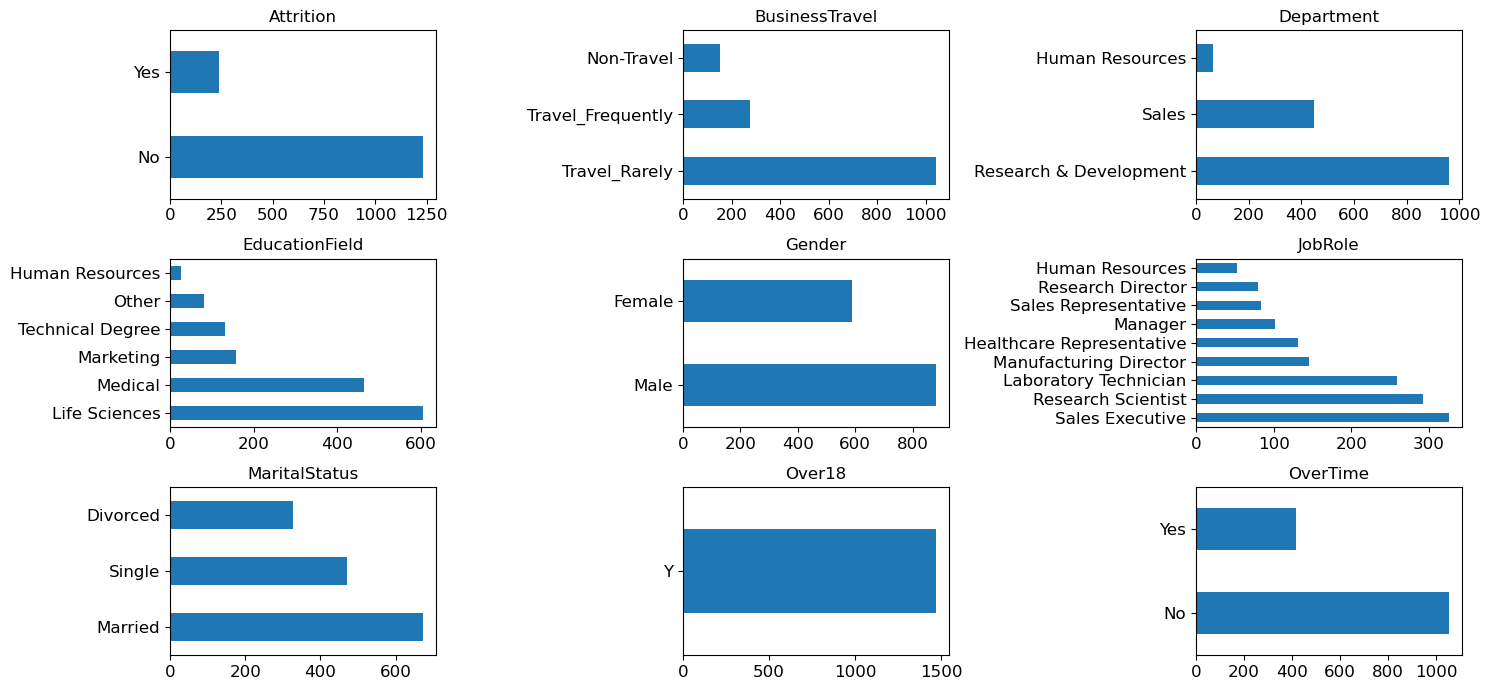

In [82]:
# plot categorical variables using barplots
len(categorical_features)
fig, axes = plt.subplots(3,3) # create figure and axes

for count, feature in enumerate(train[categorical_features]):
  counts = train[feature].value_counts()
  counts.plot(
      kind="barh",
      ax=axes.flatten()[count],
      fontsize='large',
#       color=color
      ).set_title(feature)      

fig.set_size_inches(15, 7)
plt.tight_layout() 
plt.show()


In [65]:
# evaluate normality for numerical features
for feature in numerical_features:
    print(feature)
    print(f'{"Not Gaussian" if normaltest(train[feature].values,)[1]<0.05 else "Gaussian"}  {normaltest(train[feature].values)}')
    print("\n")

Age
Not Gaussian  NormaltestResult(statistic=54.68430031753582, pvalue=1.3349194556165794e-12)


DailyRate
Not Gaussian  NormaltestResult(statistic=1179.1748729495926, pvalue=8.819211127336488e-257)


DistanceFromHome
Not Gaussian  NormaltestResult(statistic=168.69438999527182, pvalue=2.3360312516323686e-37)


Education
Not Gaussian  NormaltestResult(statistic=57.818015614923695, pvalue=2.7859763918233556e-13)


EmployeeCount
Gaussian  NormaltestResult(statistic=nan, pvalue=nan)


EmployeeNumber
Not Gaussian  NormaltestResult(statistic=1400.1895185551398, pvalue=8.968281598223583e-305)


EnvironmentSatisfaction
Not Gaussian  NormaltestResult(statistic=1190.6250775719752, pvalue=2.8777257137836584e-259)


HourlyRate
Not Gaussian  NormaltestResult(statistic=1108.7018035031092, pvalue=1.7719943434794204e-241)


JobInvolvement
Not Gaussian  NormaltestResult(statistic=58.864804776807304, pvalue=1.650707230325451e-13)


JobLevel
Not Gaussian  NormaltestResult(statistic=190.07960478746088, pv

In [69]:
# # numeric target feature statistics
# fig, ax = plt.subplots(1,3,figsize=(20,5))
# train['Attrition'].plot(kind="hist",ax=ax[0])
# train['Attrition'].plot(kind="kde",ax=ax[1])
# train['Attrition'].plot(kind="box",ax=ax[2])
# plt.show()

# print(f'{train['Attrition']}: {"Not Gaussian" if normaltest(train['Attrition'].values,)[1]<0.05 else "Gaussian"}  {normaltest(train['Attrition'].values)}')


In [74]:
# plot categorical feature & categorical target relationship
# sns.boxplot(x=train[categorical_features[0]],y=train['Attrition'])
# sns.catplot(data=train, x=categorical_features[0], y="Attrition", kind="swarm")